In [1]:
# импортируем библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
# загружаем датасет:
df = pd.read_csv("city_united.csv")
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [3]:
# проверяем наличие пропусков (по числу непустых значений каждого столбца)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [4]:
# считаем число дубликатов:
df.duplicated().sum()

0

C:\Users\user\AppData\Local\Temp\ipykernel_14072\2133458357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().apply(abs)) # модули коэффициента корреляции Спирмена


<Axes: >

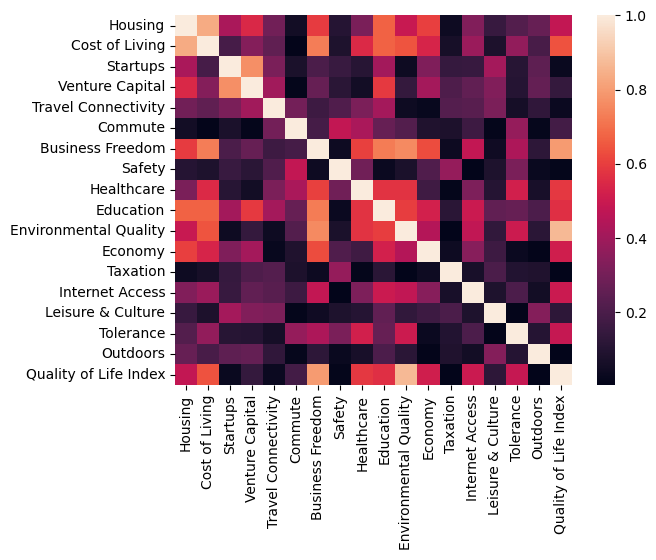

In [5]:
# строим тепловую карту:
sns.heatmap(df.corr().apply(abs)) # модули коэффициента корреляции Спирмена

In [6]:
# коэффициент корреляции Спирмена:
df['Housing'].corr(df['Cost of Living'], method='spearman')

0.865481042263839

In [7]:
# коэффициент корреляции Спирмена:
df['Startups'].corr(df['Venture Capital'], method='spearman')

0.748300105492773

In [8]:
# коэффициент корреляции Спирмена:
df['Cost of Living'].corr(df['Business Freedom'], method='spearman')

-0.7380374577133753

In [9]:
# удаление сильно коррелирующих столбцов:
df = df.drop(['Cost of Living', 'Startups'], axis=1)

In [10]:
# деление признаков на факторы и результат:
x = df.drop('Quality of Life Index', axis=1)
y = df['Quality of Life Index']

In [11]:
# деление данных на обучающие и тестовые:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=19)

In [12]:
# деление факторов на категориальные и числовые:
columns = x.columns
categorical = ['UA_Name', 'UA_Country', 'UA_Continent']
numerical = [col for col in columns if col not in categorical]

In [13]:
# OneHot-кодирование категориальных элементов:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x_train[categorical])

features_name = ohe.get_feature_names_out(categorical)
x_train[features_name] =  ohe.transform(x_train[categorical]).toarray()
x_train = x_train.drop(categorical, axis=1)

x_test[features_name] = ohe.transform(x_test[categorical]).toarray()
x_test = x_test.drop(categorical, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_14072\3315403447.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train[features_name] =  ohe.transform(x_train[categorical]).toarray()
C:\Users\user\AppData\Local\Temp\ipykernel_14072\3315403447.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x_train[features_name] =  ohe.transform(x_train[categorical]).toarray()
C:\Users\user\AppData\Local\Temp\ipykernel_14072\3315403447.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [14]:
x_train.shape

(125, 227)

In [15]:
# стандартизация числовых факторов:
scaler = StandardScaler()
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_test[numerical] = scaler.transform(x_test[numerical])

In [16]:
# строим линейную регрессию и вычисляем R^2 дл обучающих и тестовых данных:
model = LinearRegression()
model.fit(x_train, y_train)
print(f"R2 на train: {model.score(x_train, y_train)}")
print(f"R2 на test: {model.score(x_test, y_test)}")

R2 на train: 0.9854659796127408
R2 на test: -1.7365499074547468e+24


In [17]:
mean_squared_error(model.predict(x_train), y_train)

16.455060713345333

In [18]:
mean_squared_error(model.predict(x_test), y_test)

2.525732105691995e+27

In [19]:
# библиотека для вычисления пермутационной важности:
import eli5
from eli5.sklearn import PermutationImportance

In [20]:
model = LinearRegression().fit(x_train, y_train)
perm = PermutationImportance(model, random_state=19).fit(x_test, y_test)

In [21]:
eli5.show_weights(perm, feature_names=list(x_test.columns))

Weight,Feature
1358232733749807543222272.0000 ± 347122608644311666917376.0000,Business Freedom
513726159355230981980160.0000 ± 487178558233231847587840.0000,Healthcare
297025371125776472080384.0000 ± 274846705892966610763776.0000,Safety
222171961620352330629120.0000 ± 399750216034308637851648.0000,Leisure & Culture
212863087964456816214016.0000 ± 438311841219107885154304.0000,Outdoors
193636761623808748552192.0000 ± 103530361368943658008576.0000,UA_Continent_North America
183491084981737680273408.0000 ± 208879879991129437896704.0000,Commute
134022739512094581850112.0000 ± 134004528066859676729344.0000,Tolerance
112522254303988476280832.0000 ± 309022385346800955424768.0000,UA_Country_ United Kingdom
108975311343946425171968.0000 ± 50775428557193542107136.0000,Environmental Quality


In [22]:
# 20 важнейших столбцов (согласно пермутационной важности)
best_cols = ['Business Freedom', 'Healthcare', 'Safety', 'Leisure & Culture', 'Outdoors', 
             'UA_Continent_North America', 'Commute', 'Tolerance', 
             'UA_Country_ United Kingdom', 'Environmental Quality', 'Education', 'UA_Country_ Romania', 'Internet Access', 
             'UA_Country_ Switzerland', 'Venture Capital', 'UA_Continent_South America', 'Travel Connectivity', 
             'UA_Continent_Asia', 'UA_Continent_Oceania', 'UA_Country_ Ohio']

In [23]:
# очищенные от лишних факторов данные: 
x_train_clear = x_train[best_cols]
x_test_clear = x_test[best_cols]

In [24]:
# строим линейную регрессию и вычисляем R^2 дл обучающих и тестовых данных:
model = LinearRegression()
model.fit(x_train_clear, y_train)
print(f"R2 на train: {model.score(x_train_clear, y_train)}")
print(f"R2 на test: {model.score(x_test_clear, y_test)}")

R2 на train: 0.8716006365899893
R2 на test: 0.7976629081597538


In [25]:
mean_squared_error(model.predict(x_train_clear), y_train)

145.37060387769714

In [26]:
mean_squared_error(model.predict(x_test_clear), y_test)

294.29000965615904